<a href="https://www.kaggle.com/code/mohamedyosef101/global-energy-analysis?scriptVersionId=146607510" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Global energy consumption
The energy system has transformed dramatically since the Industrial Revolution. We see this transformation of the global energy supply in the interactive chart shown here. It graphs global energy consumption from 1800 onwards.

**Data Source:** [Global Energy Substitution from 1983 to 2022](https://www.kaggle.com/datasets/mohamedyosef101/global-energy-substitution-from-1983-to-2022)

![energy 2](https://github.com/mohamedyosef101/energy-substitution/assets/118842452/ffae65d5-2c29-4626-a13c-115897bc8952)


<hr>

# Step 0: set it up

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# customize the style
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = 12

# load the data
filepath = '/kaggle/input/global-energy-substitution-from-1983-to-2022/global-energy-substitution.csv'
df = pd.read_csv(filepath)

df.head()

,Year,Other_renewables,Biofuels,Solar,Wind,Hydropower,Nuclear,Gas,Oil,Coal,Traditional_biomass
0,1983,211.77058,49.01924,0.00887,0.09697,5552.54250,2933.45900,14703.83300,32956.61300,22046.34600,10321
1,1984,236.32065,57.80642,0.01866,0.13234,5740.62000,3559.85670,15902.68000,33680.13000,23001.07800,10430
2,1985,243.15495,68.41009,0.03474,0.18990,5852.60500,4224.83740,16262.22200,33667.09800,23987.82600,10541
3,1986,263.68542,84.20299,0.04490,0.41052,5931.91260,4525.08640,16421.11000,34712.90200,24258.03500,10653
4,1987,282.44330,85.33012,0.03135,0.57773,6012.11570,4922.33100,17281.89500,35404.36000,25212.42600,10765


# 1. Renewable Energy over time
---
Explore the change in Solar, Wind, Hydropower, Biofuels, Tranditional Biomass, and Other Renewables (which may include geothermal, tidal, etc.) over the time.

**Before starting** and because I don't like repeating the code so I'll create a plot fuction to use it with both renwable and non-renewable columns.


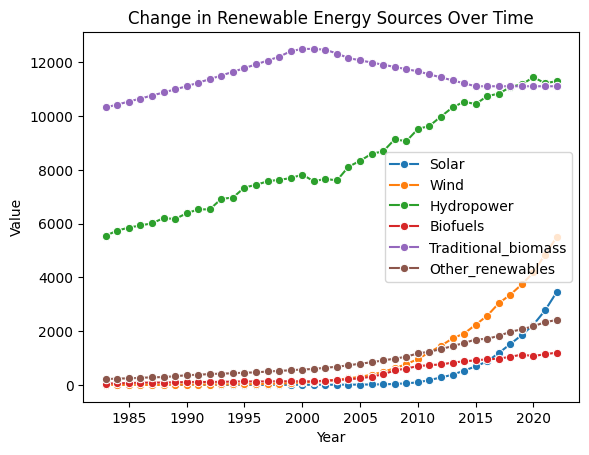

In [2]:
# here is the function
def plot_over_years(columns, title):
    for col in columns:
        sns.lineplot(data=df, x='Year', y=col, label=col, marker='o', linestyle='-')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

# Now, let's use the function
renewable_columns = ['Solar', 'Wind', 'Hydropower', 'Biofuels', 'Traditional_biomass', 'Other_renewables']
plot_over_years(renewable_columns, 'Change in Renewable Energy Sources Over Time')

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold;">As you can see, traditional biomass is going down not higher like the rest. And this because traditional biomass sources like wood, crop residues, and animal dung have relatively low energy efficiency compared to modern renewable sources like solar panels or wind turbines.</p>
<p style="color: #fc0000; font-weight: bold;">Which means: the more we have access to more efficient and cleaner energy technologies, the less we'll rely on traditional biomass.</p>
</div>

# 2. Non-Renewable Energy over time
---
Now, let's explore the change in Nuclear, Gas, Oil, and Coal over time.

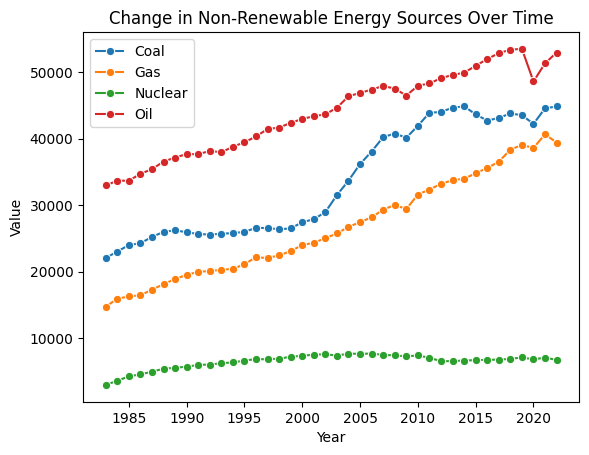

In [3]:
# using the same function but with the non-renewables
non_renewable_columns = ['Coal', 'Gas', 'Nuclear', 'Oil']
plot_over_years(non_renewable_columns, 'Change in Non-Renewable Energy Sources Over Time')

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold;">You might noticed that everthing is going up but Nuclear energy is relatively stable.</p>
<p style="color: #fc0000; font-weight: bold;">This because Nuclear energy is a reliable baseload energy source (it can generate electricity reliably 24/7), but its growth is limited by safety concerns, cost, and nuclear waste.</p>
</div>

# 3. Growth Speed.
---
I'm going to identify the fastest- and slowest-growing energy sources.

In [4]:
# Calculate annual growth rates for each energy source
for column in df.columns[2:]:  # Start from the third column ('Other_renewables' onward)
    df[f'{column}_GrowthRate'] = df[column].pct_change() * 100

# Group by energy source and calculate the average growth rate
average_growth_rates = df.iloc[:, 11:].mean()  # Columns from the 12th onward

# Sort the energy sources by average growth rate
sorted_energy_sources = average_growth_rates.sort_values(ascending=False)

# Identify the fastest and slowest-growing energy sources
fastest_growing_source = sorted_energy_sources.index[0]
slowest_growing_source = sorted_energy_sources.index[-1]

print(f"Fastest-growing energy source: {fastest_growing_source}")
print(f"Slowest-growing energy source: {slowest_growing_source}")

Fastest-growing energy source: Solar_GrowthRate
Slowest-growing energy source: Traditional_biomass_GrowthRate


<div style="background: #e3eefc; padding: 24px 12px; color: #00a; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold;">We have explained why tradition biomass is going down but why solar energy is growing so fast?</p>
<p style="color: #fc0000; font-weight: bold;">The simple answer is that solar energy's rapid growth is driven by a combination of falling costs, environmental awareness, supportive government policies, and ongoing technological progress.</p>
</div>

*The long answer in an article by Energy Concept titled [Why Solar is Growing So Fast](https://energyconceptsfresno.com/why-solar-is-growing-so-fast).*

# Next Steps
---
* **Identify the most and least significant energy sources.** You can do this by calculating the percentage contribution of each energy source to the total energy mix in each year.

* **Identify trends in the energy mix.** For example, you can look at how the relative importance of different energy sources has changed over time. You can also look at how the energy mix has changed in different regions of the world.

* **Identify factors that are driving changes in the energy mix.** For example, you can look at the impact of government policies, technological advancements, and economic conditions.

<div><br></div>

<div>
	<hr>
	<p> 🔔 Follow me for more <b>Data Science, User Experience (UX), and Machine Learning</b> content.</p>
	<hr>
</div>
<p>&copy; Created by <b>MohamedYosef101</b> | 
	<a href="https://linkedin.com/in/mohamedyosef101">LinkedIn</a> &centerdot;
	<a href="https://medium.com/in/@mohamedyosef101">Medium</a> &centerdot;
	<a href="https://github.com/mohamedyosef101">GitHub</a>
</p>